Test Accuracy: 0.8


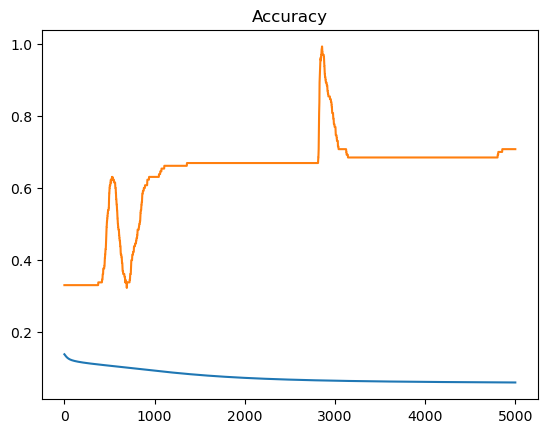

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = load_iris()

X = data.data
y = data.target

y = pd.get_dummies(y).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

learning_rate = 0.1
iterations = 5000
N = y_train.size

input_size = 4

hidden_size = 2 

output_size = 3  

results = pd.DataFrame(columns=["mse", "accuracy"])

np.random.seed(10)

W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))

W2 = np.random.normal(scale=0.5, size=(hidden_size, output_size))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2 * y_pred.size)

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

for itr in range(iterations):    
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results = pd.concat([results, pd.DataFrame({"mse": [mse], "accuracy": [acc]})], ignore_index=True)
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

results.mse.plot(title="Mean Squared Error")
results.accuracy.plot(title="Accuracy")

Z1_test = np.dot(X_test, W1)
A1_test = sigmoid(Z1_test)

Z2_test = np.dot(A1_test, W2)
A2_test = sigmoid(Z2_test)

acc_test = accuracy(A2_test, y_test)
print("Test Accuracy: {}".format(acc_test))


In [15]:
from math import exp
from random import seed
from random import random

def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

def transfer_derivative(output):
    return output * (1.0 - output)

def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(neuron['output'] - expected[j])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] -= l_rate * neuron['delta']

def train_network(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[int(row[-1])] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        print('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

seed(1)
dataset = [[2.7810836,2.550537003,0],
           [1.465489372,2.362125076,0],
           [3.396561688,4.400293529,0],
           [1.38807019,1.850220317,0],
           [3.06407232,3.005305973,0],
           [7.627531214,2.759262235,1],
           [5.332441248,2.088626775,1],
           [6.922596716,1.77106367,1],
           [8.675418651,-0.242068655,1],
           [7.673756466,3.508563011,1]]
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.5, 20, n_outputs)
for layer in network:
    print(layer)


epoch=0, lrate=0.500, error=6.350
epoch=1, lrate=0.500, error=5.531
epoch=2, lrate=0.500, error=5.221
epoch=3, lrate=0.500, error=4.951
epoch=4, lrate=0.500, error=4.519
epoch=5, lrate=0.500, error=4.173
epoch=6, lrate=0.500, error=3.835
epoch=7, lrate=0.500, error=3.506
epoch=8, lrate=0.500, error=3.192
epoch=9, lrate=0.500, error=2.898
epoch=10, lrate=0.500, error=2.626
epoch=11, lrate=0.500, error=2.377
epoch=12, lrate=0.500, error=2.153
epoch=13, lrate=0.500, error=1.953
epoch=14, lrate=0.500, error=1.774
epoch=15, lrate=0.500, error=1.614
epoch=16, lrate=0.500, error=1.472
epoch=17, lrate=0.500, error=1.346
epoch=18, lrate=0.500, error=1.233
epoch=19, lrate=0.500, error=1.132
[{'weights': [-1.4688375095432327, 1.850887325439514, 1.0858178629550297], 'output': 0.029980305604426185, 'delta': 0.0059546604162323625}, {'weights': [0.37711098142462157, -0.0625909894552989, 0.2765123702642716], 'output': 0.9456229000211323, 'delta': -0.0026279652850863837}]
[{'weights': [2.51539464939784